#### Посмотрим на некоторые статистические характеристики финансовых показателей данных в датасете 'apple.csv', к которому была применена модель случайного леса. 

#### Визуализируем данные для колонок 'Open' и 'Volume' в датасете с применением методов Скользящей средней, Простого экспоненциального сглаживания и Двойного экспоненциального сглаживания.

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

In [3]:
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [4]:
dataset = pd.read_csv('apple.csv', index_col=['Date'], parse_dates=['Date'])
dataset_open = dataset.drop(['Low', 'Close', 'Adj Close', 'High', 'Volume'], axis=1)
plotly_df(dataset_open, title = "Open")

In [5]:
dataset_volume = dataset.drop(['Open', 'Low', 'Adj Close', 'High', 'Close'], axis=1)
plotly_df(dataset_volume, title = "Volume")

### Посмотрим на графики с применением метода Скользящей средней

In [8]:
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(series[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

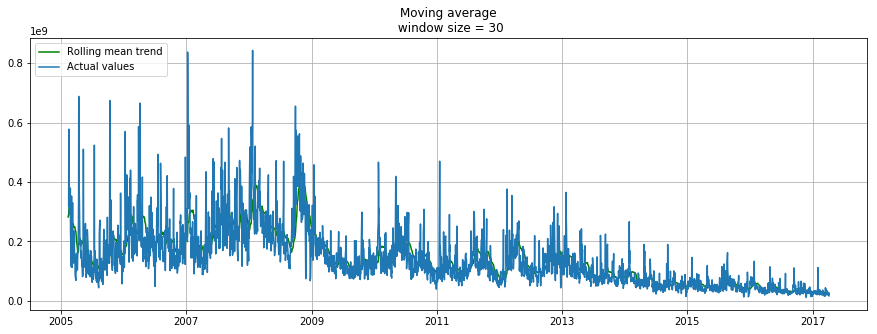

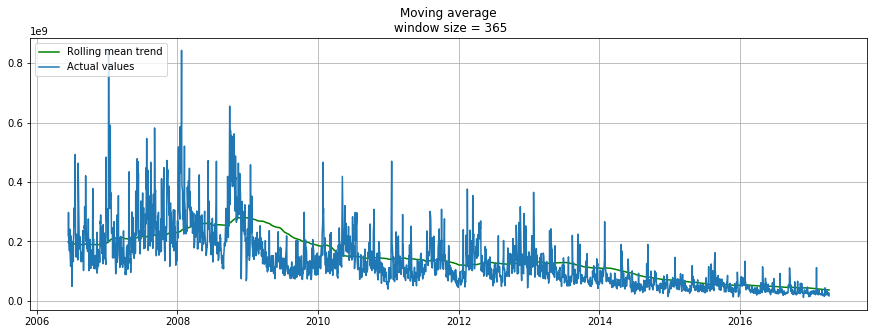

In [9]:
plotMovingAverage(dataset_volume, 30) 
plotMovingAverage(dataset_volume, 365) 

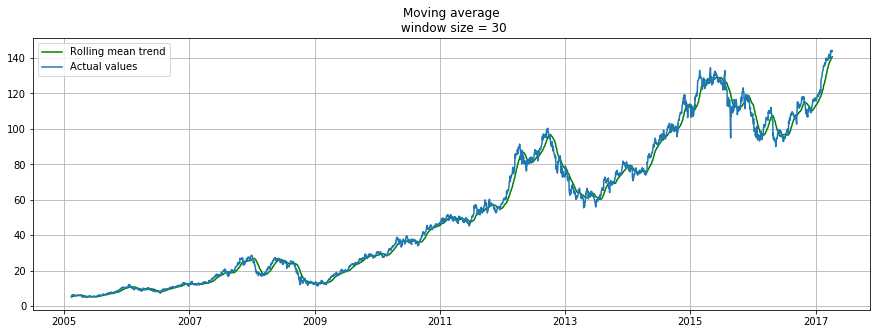

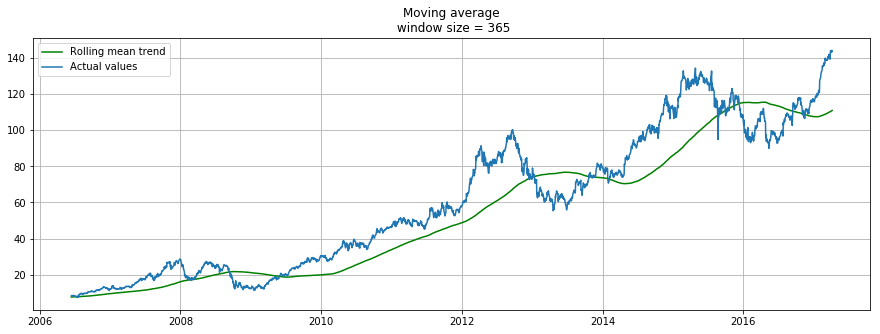

In [10]:
plotMovingAverage(dataset_open, 30) 
plotMovingAverage(dataset_open, 365)

### Посмотрим на графики с применением метода простого экспоненциального сглаживания

In [11]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [12]:
def get_plot(dataset):
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in [0.3, 0.05]:
            plt.plot(exponential_smoothing(dataset, alpha), label="Alpha {}".format(alpha))
        plt.plot(dataset.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True)

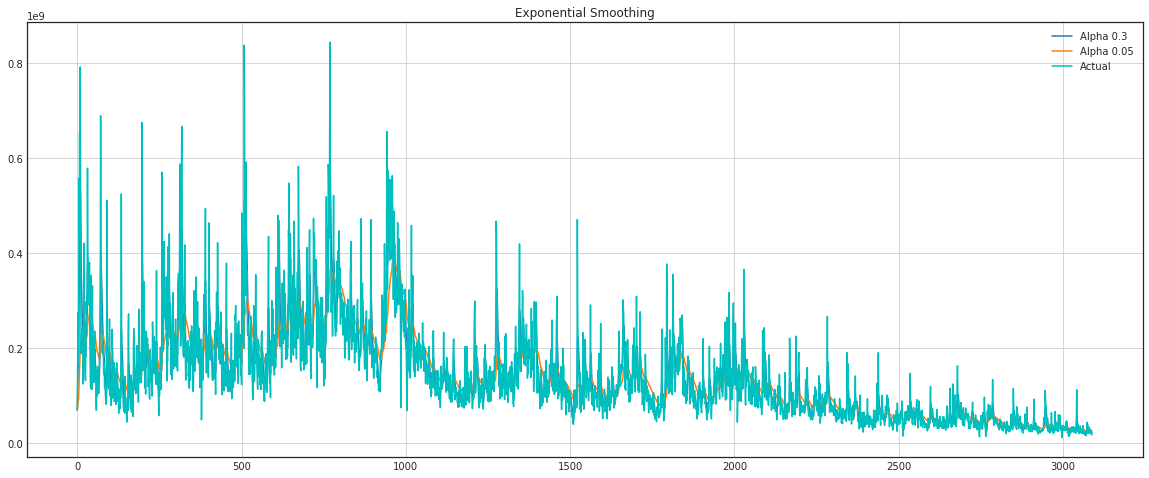

In [13]:
get_plot(dataset_volume.Volume)

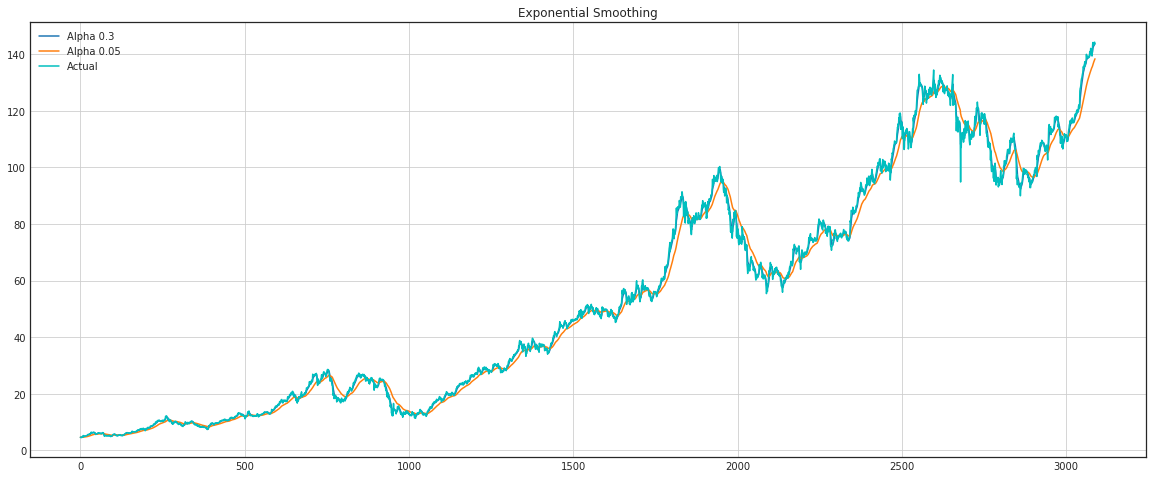

In [14]:
get_plot(dataset_open.Open)

### Посмотрим на графики с применением метода двойного экспоненциального сглаживания 

In [15]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): 
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

In [16]:
def get_plot(dataset):
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 8))
        for alpha in [0.9, 0.02]:
            for beta in [0.9, 0.02]:
                plt.plot(double_exponential_smoothing(dataset, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(dataset.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

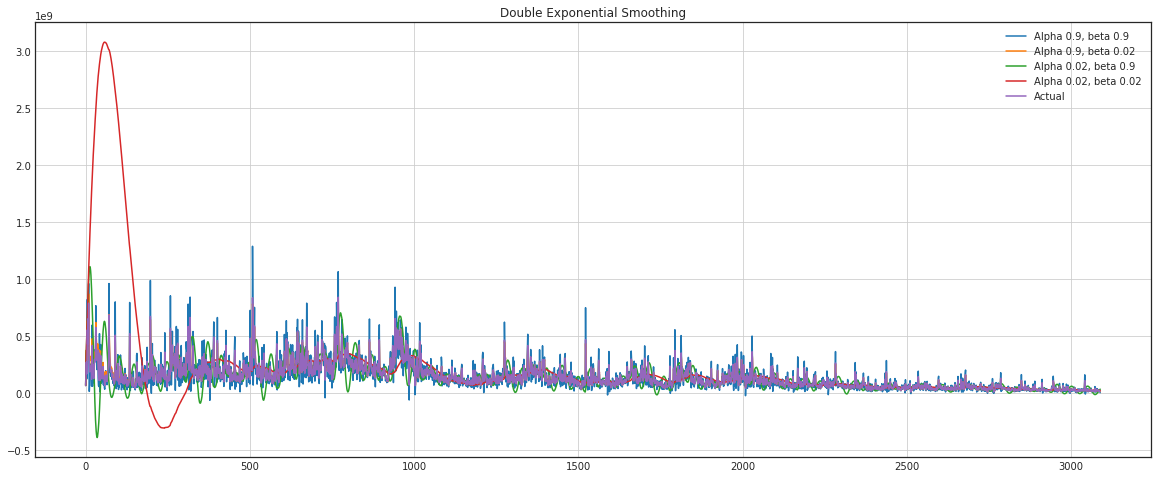

In [17]:
get_plot(dataset_volume.Volume)

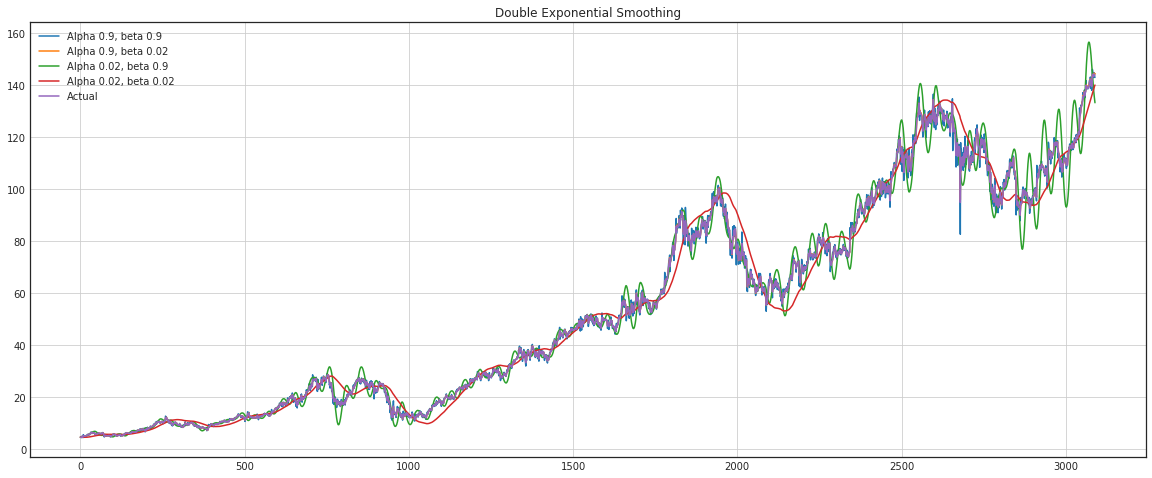

In [18]:
get_plot(dataset_open.Open)